In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [39]:
sns.set( font_scale = 2,
       style = 'whitegrid',
       rc = {'figure.figsize':(20,7)})

In [2]:
sales_team = pd.read_csv('C:/Users/79295/Desktop/GITHUB/Analytical-practice/datasets/sales_team.csv')
order_leads = pd.read_csv('C:/Users/79295/Desktop/GITHUB/Analytical-practice/datasets/order_leads.csv')
invoices = pd.read_csv('C:/Users/79295/Desktop/GITHUB/Analytical-practice/datasets/invoices.csv')

In [3]:
sales_team.head(5)

Sales Rep      Sales Rep Id            Company Name        Company Id
0  William Taylor  ZTZA0ZLYZR85PTUJ  Melancholy Social-Role  D0AUXPP07H6AVSGD
1  William Taylor  ZTZA0ZLYZR85PTUJ          Pee-Wee Pigeon  TJW99R4RWH02INII
2  William Taylor  ZTZA0ZLYZR85PTUJ     Vaginal 36-Year-Old  3S20IO1O1DYXMUNU
3  William Taylor  ZTZA0ZLYZR85PTUJ    Unhurried Musician'S  FDWW0TQRPGMVI2A7
4  William Taylor  ZTZA0ZLYZR85PTUJ     Comprehensive Lists  C30FY83UNLVBA0O3

In [4]:
sales_team = sales_team.rename(columns={"Sales Rep":"sales_rep","Company Id":"company_id","Company Name":"company_name" \
                        ,"Sales Rep Id":"sales_rep_id"})
sales_team.head()

sales_rep      sales_rep_id            company_name        company_id
0  William Taylor  ZTZA0ZLYZR85PTUJ  Melancholy Social-Role  D0AUXPP07H6AVSGD
1  William Taylor  ZTZA0ZLYZR85PTUJ          Pee-Wee Pigeon  TJW99R4RWH02INII
2  William Taylor  ZTZA0ZLYZR85PTUJ     Vaginal 36-Year-Old  3S20IO1O1DYXMUNU
3  William Taylor  ZTZA0ZLYZR85PTUJ    Unhurried Musician'S  FDWW0TQRPGMVI2A7
4  William Taylor  ZTZA0ZLYZR85PTUJ     Comprehensive Lists  C30FY83UNLVBA0O3

In [5]:
order_leads.head(5)

Order Id        Company Id            Company Name        Date  \
0  HZSXLI1IS9RGABZW  D0AUXPP07H6AVSGD  Melancholy Social-Role  2017-10-13   
1  582WPS3OW8T6YT0R  D0AUXPP07H6AVSGD  Melancholy Social-Role  2017-09-02   
2  KRF65MQZBOYG4Y9T  D0AUXPP07H6AVSGD  Melancholy Social-Role  2016-12-21   
3  N3EDZ5V1WGSWW828  D0AUXPP07H6AVSGD  Melancholy Social-Role  2018-06-03   
4  QXBC8COXEXGFSPLP  D0AUXPP07H6AVSGD  Melancholy Social-Role  2014-07-26   

   Order Value  Converted  
0         6952          0  
1         7930          0  
2         5538          1  
3         1113          0  
4         4596          0

In [107]:
order_leads=order_leads.rename(columns={"Order Id":"order_id",
                                        "Company Id":"company_id",
                                        "Company Name":"company_name",
                                        "Date":"date", 
                                        "Order Value":"order_value",
                                        "Converted":"converted"})
order_leads.head()

order_id        company_id            company_name       date  \
0  HZSXLI1IS9RGABZW  D0AUXPP07H6AVSGD  Melancholy Social-Role 2017-10-13   
1  582WPS3OW8T6YT0R  D0AUXPP07H6AVSGD  Melancholy Social-Role 2017-09-02   
2  KRF65MQZBOYG4Y9T  D0AUXPP07H6AVSGD  Melancholy Social-Role 2016-12-21   
3  N3EDZ5V1WGSWW828  D0AUXPP07H6AVSGD  Melancholy Social-Role 2018-06-03   
4  QXBC8COXEXGFSPLP  D0AUXPP07H6AVSGD  Melancholy Social-Role 2014-07-26   

   order_value  converted  
0         6952          0  
1         7930          0  
2         5538          1  
3         1113          0  
4         4596          0

In [111]:
order_leads_with_team_data = order_leads.merge(sales_team, how = 'left', on = ['company_name', 'company_id'])

In [122]:
top_sales = order_leads_with_team_data.groupby('sales_rep',as_index=False) \
    .agg({"converted":"mean"}) \
    .sort_values(by='converted',ascending=False) \
    .head(10)
top_sales

sales_rep  converted
151    Ginger Wright   0.368421
438    Sierra Garcia   0.363636
466   Thomas Fortner   0.352941
249  Katie Rodriquez   0.333333
225      Jose Gaines   0.326087
455       Teddy Cook   0.315789
187     Jason Miller   0.307692
468   Thomas Lindsey   0.304348
192    Jennifer Peck   0.304348
346       Nick Allen   0.298507

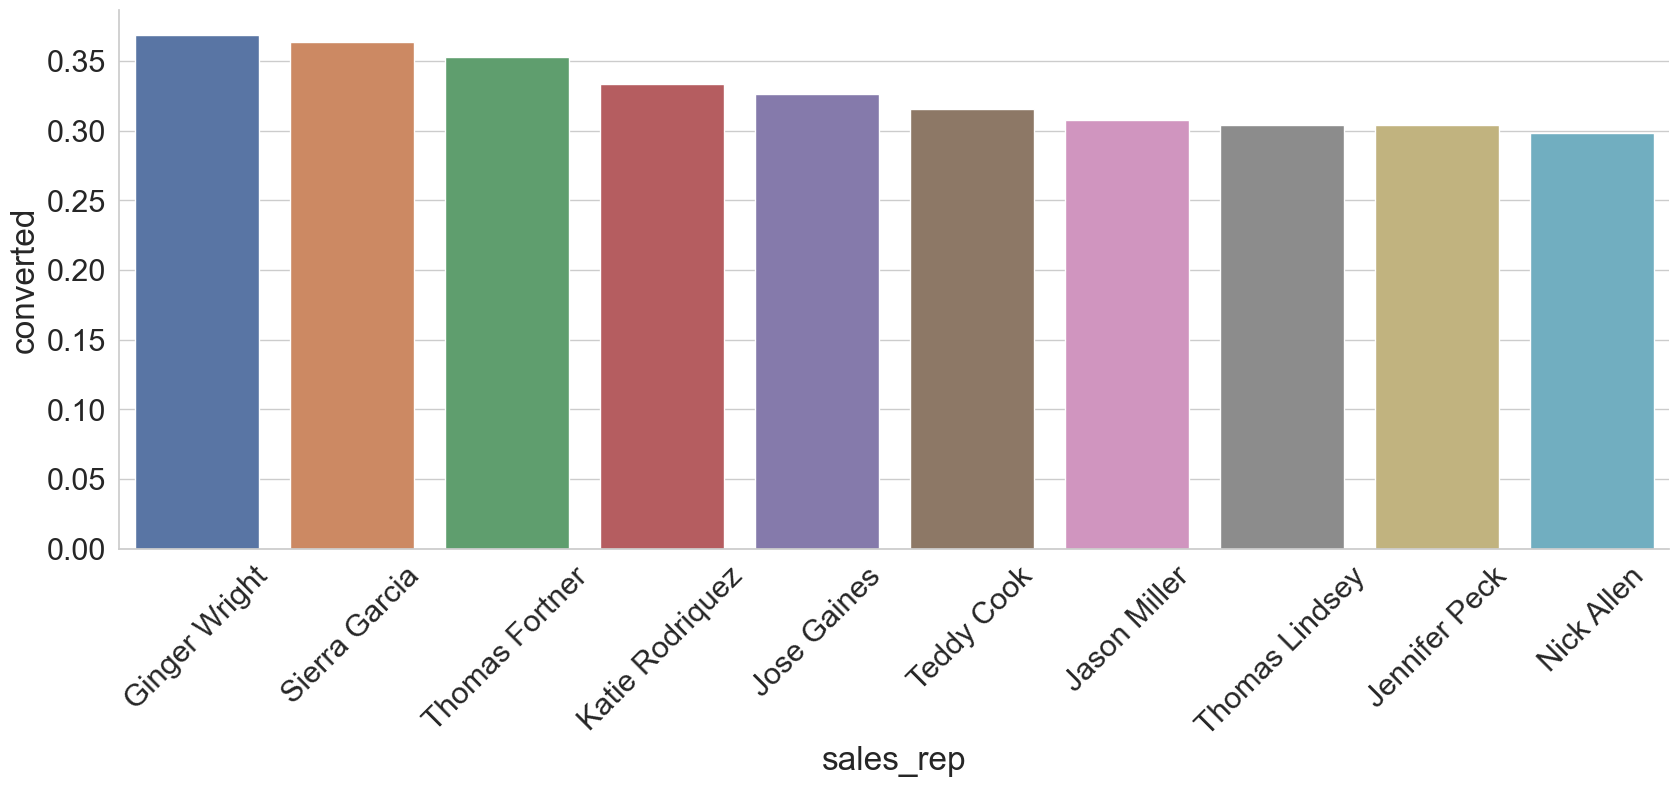

In [128]:
ax1 = sns.barplot(data = top_sales, x = 'sales_rep',y = 'converted' )
ax1.set_xticklabels(top_sales.sales_rep,rotation = 45)
sns.despine()

In [134]:
all_sales = order_leads_with_team_data.groupby('sales_rep',as_index=False) \
    .agg({"converted":"mean"}) \
    .sort_values(by='converted',ascending=False)

C:\Users\79295\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='converted'>

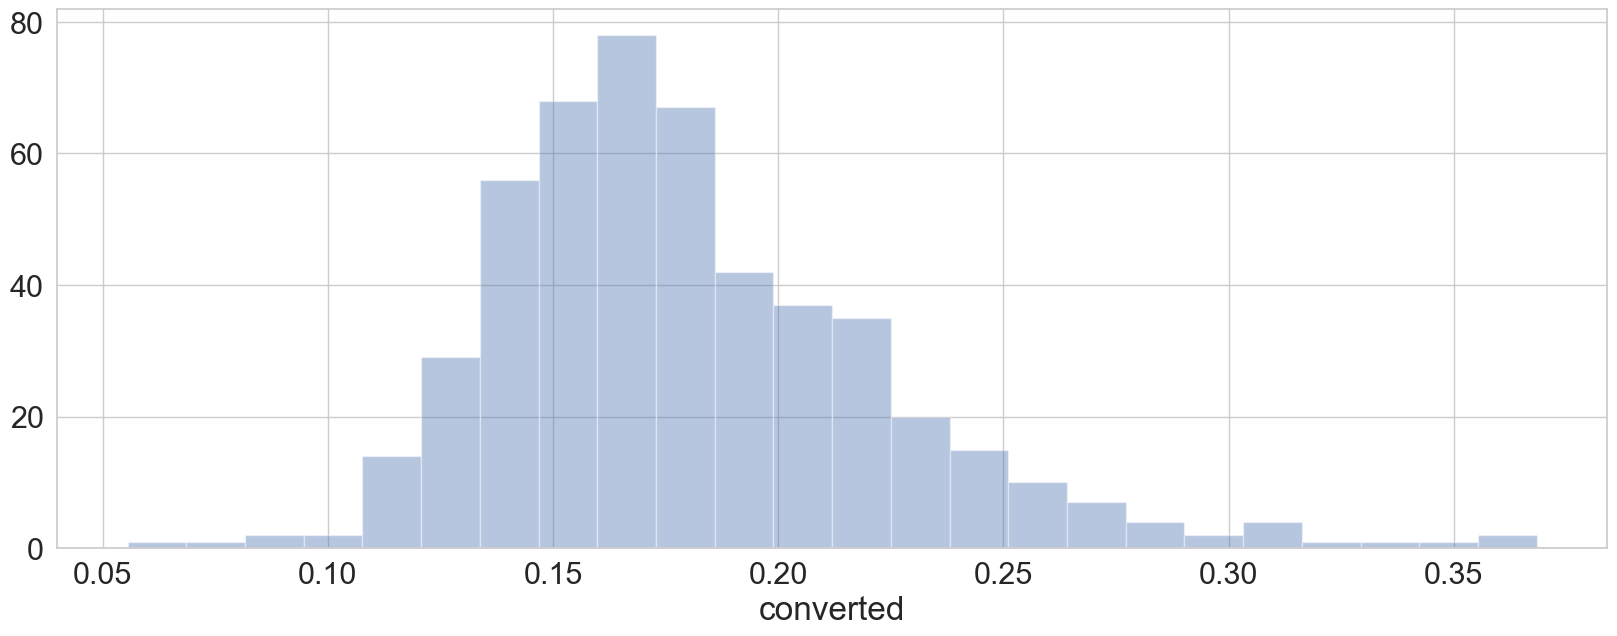

In [135]:
sns.distplot(all_sales.converted,kde=False)

In [7]:
order_leads.dtypes

order_id        object
company_id      object
company_name    object
date            object
order_value      int64
converted        int64
dtype: object

In [8]:
order_leads.date = pd.to_datetime(order_leads.date)

In [9]:
order_leads.dtypes

order_id                object
company_id              object
company_name            object
date            datetime64[ns]
order_value              int64
converted                int64
dtype: object

In [10]:
invoices.head(5)

Meal Id        Company Id         Date of Meal  \
0  QBGU1W8BRZZFHYUZ  D0AUXPP07H6AVSGD  2017-10-09 21:00:00   
1  QFNO07V7P3BTJSDK  D0AUXPP07H6AVSGD  2018-06-07 07:00:00   
2  ZDQ15BT9LLWUQ6M8  D0AUXPP07H6AVSGD  2014-12-18 20:00:00   
3  GL1ZVDU85Q9EO4TA  D0AUXPP07H6AVSGD  2018-03-05 12:00:00   
4  42GWYA5XD8NVINY3  D0AUXPP07H6AVSGD  2017-06-17 08:00:00   

                       Participants  Meal Price  
0                 ['Violet Medina']       598.0  
1                 ['Connie Harper']        89.0  
2                  ['Arthur Lopez']       295.0  
3  ['Violet Medina' 'Arthur Lopez']       193.0  
4                  ['Arthur Lopez']       348.0

In [12]:
invoices=invoices.rename(columns={
    "Meal Id":"meal_id",
    "Company Id":"company_id",
    "Date of Meal":"date_of_meal",
    "Participants":"participants",
    "Meal Price":"meal_price"})
invoices.head()

meal_id        company_id         date_of_meal  \
0  QBGU1W8BRZZFHYUZ  D0AUXPP07H6AVSGD  2017-10-09 21:00:00   
1  QFNO07V7P3BTJSDK  D0AUXPP07H6AVSGD  2018-06-07 07:00:00   
2  ZDQ15BT9LLWUQ6M8  D0AUXPP07H6AVSGD  2014-12-18 20:00:00   
3  GL1ZVDU85Q9EO4TA  D0AUXPP07H6AVSGD  2018-03-05 12:00:00   
4  42GWYA5XD8NVINY3  D0AUXPP07H6AVSGD  2017-06-17 08:00:00   

                       participants  meal_price  
0                 ['Violet Medina']       598.0  
1                 ['Connie Harper']        89.0  
2                  ['Arthur Lopez']       295.0  
3  ['Violet Medina' 'Arthur Lopez']       193.0  
4                  ['Arthur Lopez']       348.0

In [13]:
invoices.dtypes


meal_id          object
company_id       object
date_of_meal     object
participants     object
meal_price      float64
dtype: object

In [14]:
invoices.date_of_meal = pd.to_datetime(invoices.date_of_meal)

In [15]:
invoices.head()

meal_id        company_id        date_of_meal  \
0  QBGU1W8BRZZFHYUZ  D0AUXPP07H6AVSGD 2017-10-09 21:00:00   
1  QFNO07V7P3BTJSDK  D0AUXPP07H6AVSGD 2018-06-07 07:00:00   
2  ZDQ15BT9LLWUQ6M8  D0AUXPP07H6AVSGD 2014-12-18 20:00:00   
3  GL1ZVDU85Q9EO4TA  D0AUXPP07H6AVSGD 2018-03-05 12:00:00   
4  42GWYA5XD8NVINY3  D0AUXPP07H6AVSGD 2017-06-17 08:00:00   

                       participants  meal_price  
0                 ['Violet Medina']       598.0  
1                 ['Connie Harper']        89.0  
2                  ['Arthur Lopez']       295.0  
3  ['Violet Medina' 'Arthur Lopez']       193.0  
4                  ['Arthur Lopez']       348.0

In [16]:
invoices.dtypes

meal_id                 object
company_id              object
date_of_meal    datetime64[ns]
participants            object
meal_price             float64
dtype: object

In [17]:
# Посотроим график процента реализованных сделок по дням (CR):

In [18]:
order_leads.head()

order_id        company_id            company_name       date  \
0  HZSXLI1IS9RGABZW  D0AUXPP07H6AVSGD  Melancholy Social-Role 2017-10-13   
1  582WPS3OW8T6YT0R  D0AUXPP07H6AVSGD  Melancholy Social-Role 2017-09-02   
2  KRF65MQZBOYG4Y9T  D0AUXPP07H6AVSGD  Melancholy Social-Role 2016-12-21   
3  N3EDZ5V1WGSWW828  D0AUXPP07H6AVSGD  Melancholy Social-Role 2018-06-03   
4  QXBC8COXEXGFSPLP  D0AUXPP07H6AVSGD  Melancholy Social-Role 2014-07-26   

   order_value  converted  
0         6952          0  
1         7930          0  
2         5538          1  
3         1113          0  
4         4596          0

In [23]:
# Количество сделок по дням
order_leads.groupby(['date','converted'],as_index=False) \
    .agg({"company_id":"count"}) \
    .rename(columns={"company_id":"count"}) \
    .sort_values(by="date")

date  converted  count
0    2014-01-01          0     37
1    2014-01-01          1     11
2    2014-01-02          0     40
3    2014-01-02          1     12
4    2014-01-03          0     53
...         ...        ...    ...
3647 2018-12-29          1      7
3648 2018-12-30          0     50
3649 2018-12-30          1     12
3650 2018-12-31          0     46
3651 2018-12-31          1      4

[3652 rows x 3 columns]

In [28]:
cr_by_date = order_leads.groupby('date') \
    .agg({"converted":"mean"}) \
    .rename(columns={"converted":"CR"}) \
    .sort_values(by="date")
cr_by_date

CR
date                
2014-01-01  0.229167
2014-01-02  0.230769
2014-01-03  0.116667
2014-01-04  0.178571
2014-01-05  0.140000
...              ...
2018-12-27  0.109091
2018-12-28  0.139535
2018-12-29  0.132075
2018-12-30  0.193548
2018-12-31  0.080000

[1826 rows x 1 columns]

<AxesSubplot:xlabel='date'>

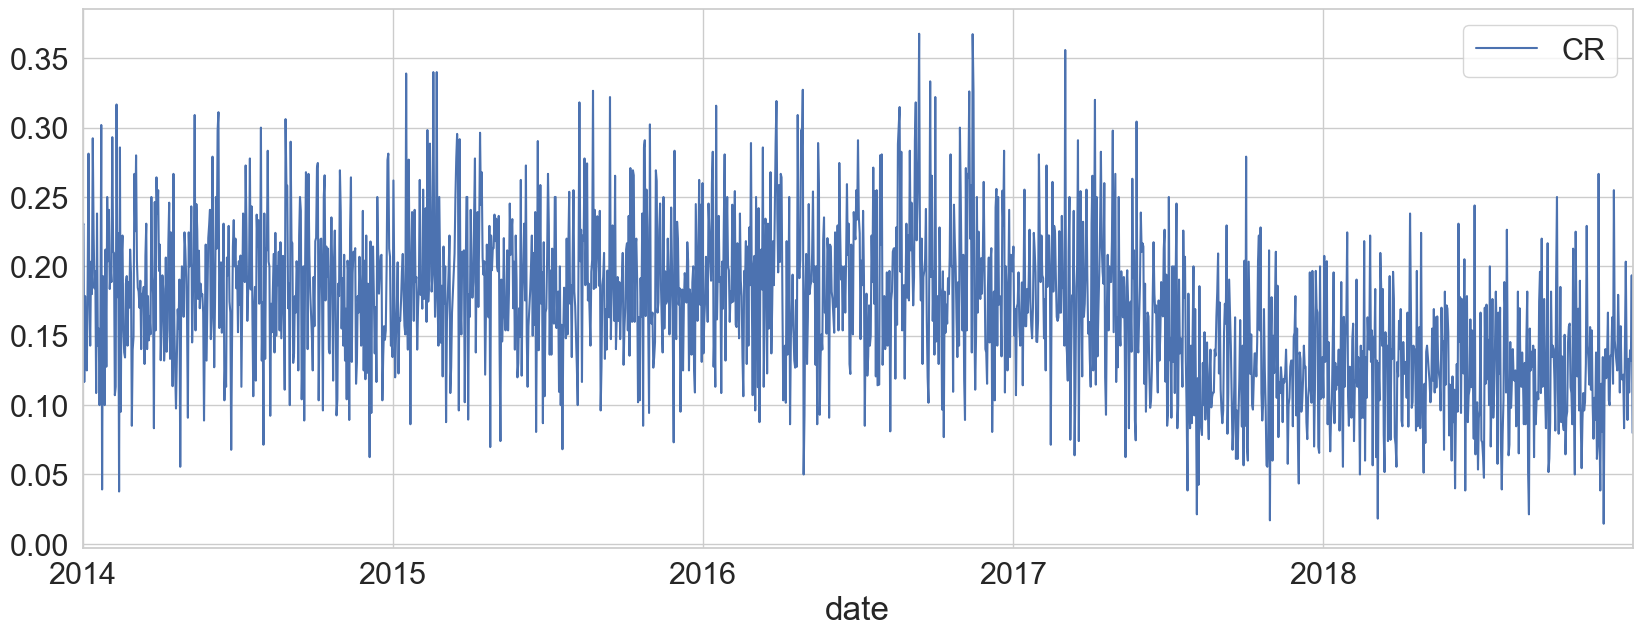

In [40]:
cr_by_date.plot()

In [31]:
# Схлопнем нашу визуализацию через скользящее среднее:

In [103]:
cr_by_day_rolling = order_leads.groupby('date') \
    .agg({"converted":"mean"}) \
    .rename(columns={"converted":"CR"}) \
    .sort_values(by="date") \
    .rolling(30) \
    .mean()

In [88]:
# Кастомизируем внешний вид:

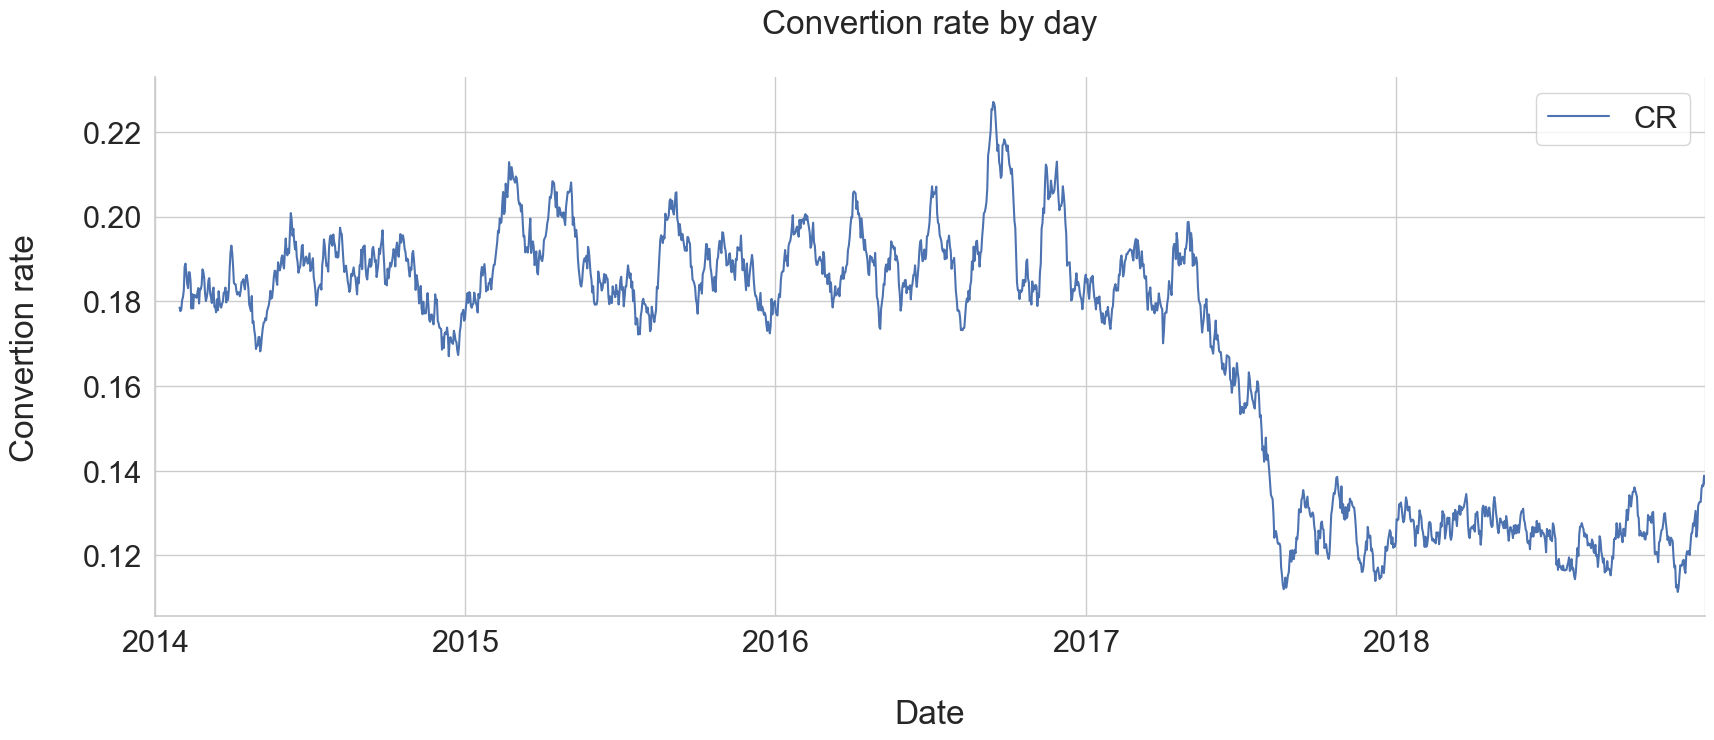

In [89]:
ax = cr_by_day_rolling.plot()
ax.set_title('Convertion rate by day\n')
ax.set_ylabel('Convertion rate\n')
ax.set_xlabel('\nDate')
sns.despine()

In [90]:
# Создадим функцию:

In [91]:
def get_plot(df, x_label = '', y_label = '', title = ''):
    ax = df.plot()
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    sns.despine()

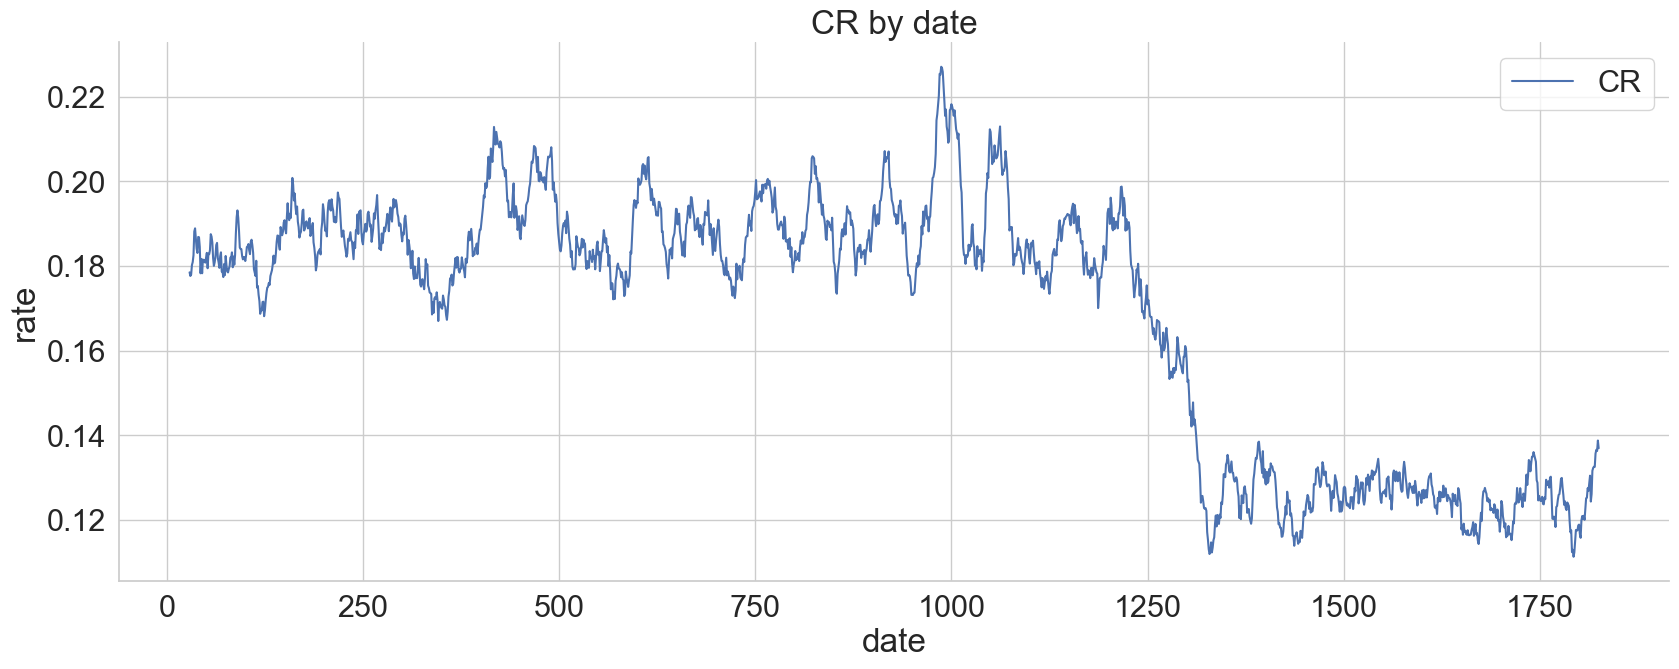

In [84]:
get_plot(cr_by_day_rolling, x_label = 'date', y_label = 'rate', title = 'CR by date')

In [104]:
cr_by_day_rolling = cr_by_day_rolling.reset_index()
cr_by_day_rolling

date        CR
0    2014-01-01       NaN
1    2014-01-02       NaN
2    2014-01-03       NaN
3    2014-01-04       NaN
4    2014-01-05       NaN
...         ...       ...
1821 2018-12-27  0.135736
1822 2018-12-28  0.136614
1823 2018-12-29  0.136338
1824 2018-12-30  0.138810
1825 2018-12-31  0.136989

[1826 rows x 2 columns]

In [105]:
cr_by_day_rolling = cr_by_day_rolling.dropna()
cr_by_day_rolling

date        CR
29   2014-01-30  0.178512
30   2014-01-31  0.177663
31   2014-02-01  0.177996
32   2014-02-02  0.180229
33   2014-02-03  0.180944
...         ...       ...
1821 2018-12-27  0.135736
1822 2018-12-28  0.136614
1823 2018-12-29  0.136338
1824 2018-12-30  0.138810
1825 2018-12-31  0.136989

[1797 rows x 2 columns]

In [106]:
df = cr_by_day_rolling
fig = px.line(df, x="date", y="CR", title='CR by date')
fig.show()